Color Enhancement based method, Gamma Correction

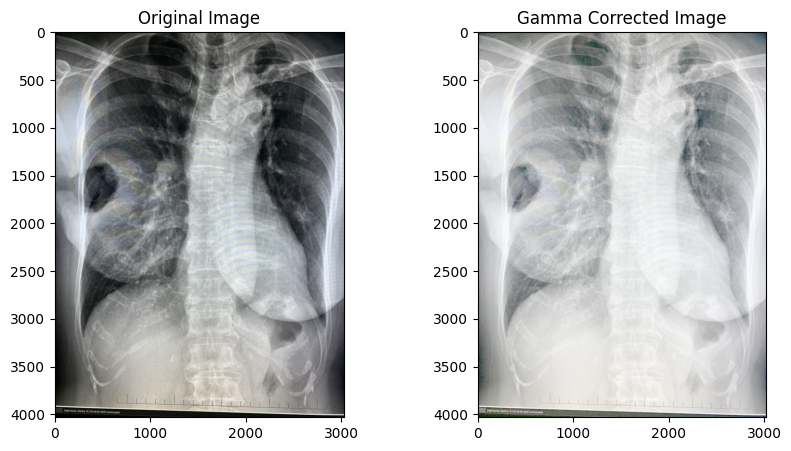

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Load image
image = cv2.imread('/content/brest cancer.jpg')
gamma_corrected = gamma_correction(image, gamma=3.0)

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Gamma Corrected Image')
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.show()

Histogram-Based Methods,Contrast-limited Adaptive Histogram Equalization (CLAHE

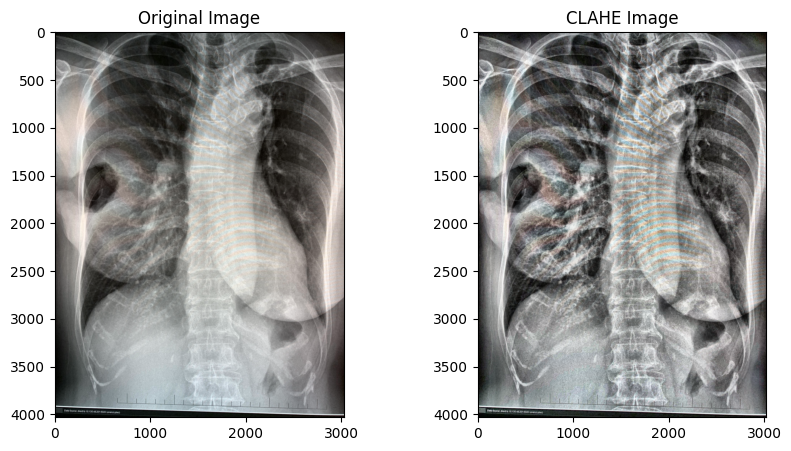

In [4]:
def clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(15, 15))
    if image is not None: # Check if image was loaded successfully
        if len(image.shape) == 2:
            return clahe.apply(image)
        elif len(image.shape) == 3:
            channels = cv2.split(image)
            clahe_channels = [clahe.apply(ch) for ch in channels]
            return cv2.merge(clahe_channels)
    else:
        return None # Handle the case where image is None

# Load image. Make sure 'image_path' is correct.
image_path = '/content/brest cancer.jpg'
clahe_image = clahe(image)

# Display the result
if clahe_image is not None: # Check if CLAHE was applied successfully
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title('CLAHE Image')
    plt.imshow(clahe_image, cmap='gray')
    plt.show()
else:
    print("Failed to load or apply CLAHE to the image. Check the file path.")